# Decision Tree Classifier 
## -> without removing stopwords, with stemming
- Accuracy: 0.8285

In [134]:
import pandas as pd
df = pd.read_csv('dataset.csv')

df_sample = df.sample(20000)

df_target = df_sample['humor']
df_data = df_sample.copy()
df_data.drop(columns='humor')

df_target.head()

150899    False
168176     True
104915    False
94784      True
165372     True
Name: humor, dtype: bool

In [135]:
df['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

# Preprocessing

In [136]:
from sklearn import preprocessing

#encode target to numeric
label_encoder = preprocessing.LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
df_target

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

#Apply CountVectorizer on text column

#vectorizer = CountVectorizer(binary=True)

#If this vectorizer is used, a word which occurs multiple times is counted and not just displayed as 1 = word occurs 
cVectorizer = CountVectorizer(binary=False)

matrix = vectorizer.fit_transform(df_data['text'].head(15))

print("Vectorizer created {} features.".format(len(vectorizer.get_feature_names())))

df_data_countVectorized = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(df_data_countVectorized)

Vectorizer created 129 features.


C:\Users\.Eva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adventure,all,always,an,and,are,army,asian,balls,because,...,went,what,wheels,when,why,wishes,without,women,worse,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string

#when running for the first time you need to activate this line for once.
#nltk.download('stopwords')

#definition of stemming function
token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text)
    for item in tokens:
        stems.append(stemmer.stem(item))
    return stems

In [139]:
#Stemming
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.0015)
matrix = stem_vectorizer.fit_transform(df_data['text'])

df_data_stemmed = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names())
display(df_data_stemmed)

C:\Users\.Eva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,11,12,13,14,15,17,20,...,ye,year,yet,yo,yoga,york,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.43568,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


# Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create train/test split
df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_stemmed, df_target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(df_data_train, df_target_train)   

df_prediction = dt.predict(df_data_test)

print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.806


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=4)
grid_search_cv.fit(df_data_train, df_target_train)
grid_search_cv.best_estimator_

Fitting 4 folds for each of 98 candidates, totalling 392 fits


DecisionTreeClassifier(max_leaf_nodes=84, random_state=42)

In [142]:
dt = DecisionTreeClassifier(max_leaf_nodes=84, random_state=42)
dt.fit(df_data_train, df_target_train)   
dt.fit(df_data_train, df_target_train)   

df_prediction = dt.predict(df_data_test)

print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.8285


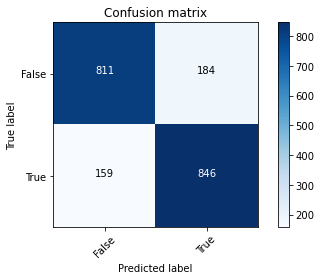

In [143]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
cnf_matrix = confusion_matrix(df_target_test, df_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)